In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from src.fbm.fbm import FBM
from src import build_visibility_graph 
import networkx as nx

In [27]:
%%time
graphs = dict()
n = 1000

for hurst in [0.25, 0.5, 0.75]:
    y = FBM(n=n, hurst=hurst, length=1, method='daviesharte').fbm()
    x = list(range(len(y)))
    edges = build_visibility_graph.create_edges(x, y)
    graphs[hurst] = nx.from_edgelist(edges)

CPU times: user 24 s, sys: 284 ms, total: 24.3 s
Wall time: 24.3 s


In [30]:
get_degs = lambda g: [g.degree(x) for x in g.nodes]
degs = {k:get_degs(v) for k,v in graphs.items()}

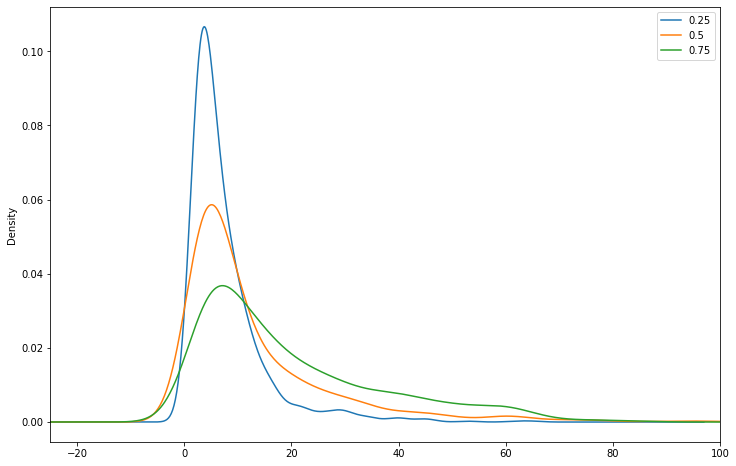

In [72]:
df = pd.DataFrame(degs)
ax = df.plot(kind='density', figsize=(12,8), xlim=(-25,100))

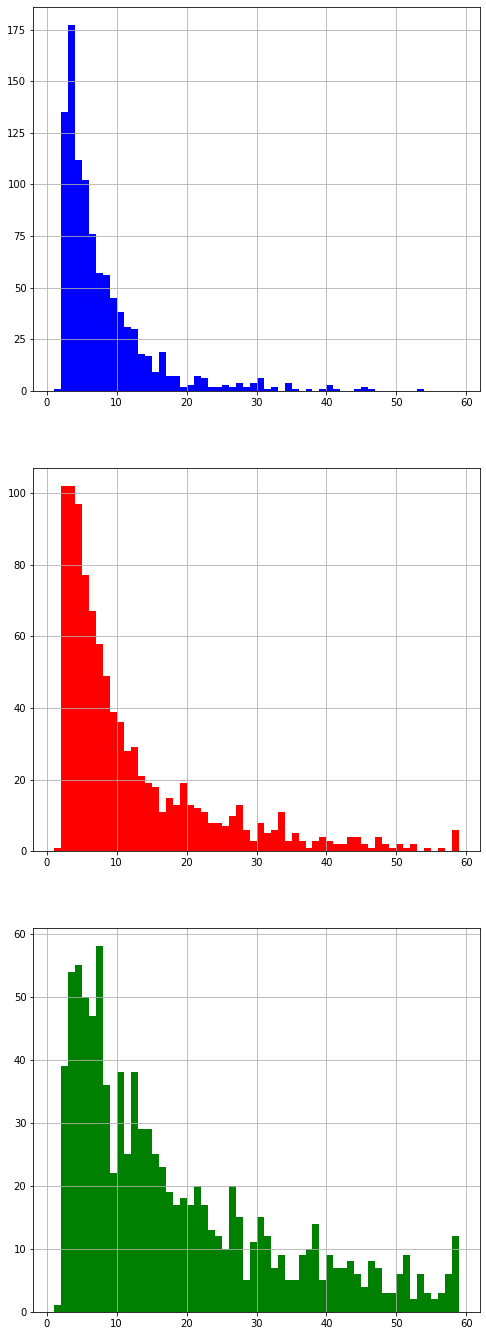

In [62]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,24))
def p(ax, y, color='blue'):
    ax.hist(y, bins=range(1,60,1), color=color,);
    ax.grid()

ax = fig.add_subplot(311)
p(ax, degs[0.25])
ax = fig.add_subplot(312)
p(ax, degs[0.5], 'red')
ax = fig.add_subplot(313)
p(ax, degs[0.75], 'green')

In [45]:
degs[0.25]

[4,
 3,
 3,
 6,
 45,
 4,
 4,
 3,
 2,
 40,
 4,
 12,
 16,
 9,
 11,
 11,
 18,
 15,
 16,
 46,
 18,
 7,
 34,
 12,
 18,
 32,
 26,
 14,
 18,
 14,
 30,
 14,
 53,
 12,
 31,
 41,
 34,
 29,
 65,
 30,
 44,
 30,
 39,
 27,
 34,
 29,
 40,
 62,
 30,
 5,
 4,
 16,
 7,
 3,
 3,
 3,
 3,
 3,
 7,
 6,
 5,
 5,
 3,
 2,
 5,
 5,
 2,
 2,
 27,
 9,
 10,
 29,
 12,
 12,
 2,
 25,
 6,
 6,
 7,
 2,
 3,
 3,
 7,
 3,
 8,
 8,
 13,
 3,
 5,
 3,
 3,
 3,
 3,
 2,
 5,
 3,
 8,
 5,
 5,
 3,
 2,
 2,
 6,
 6,
 5,
 8,
 21,
 3,
 3,
 3,
 9,
 7,
 7,
 5,
 7,
 6,
 14,
 11,
 6,
 11,
 8,
 7,
 2,
 6,
 4,
 2,
 2,
 16,
 11,
 9,
 7,
 7,
 9,
 12,
 7,
 9,
 7,
 9,
 3,
 5,
 6,
 3,
 6,
 5,
 22,
 7,
 10,
 4,
 9,
 10,
 6,
 9,
 5,
 5,
 4,
 10,
 3,
 7,
 3,
 3,
 3,
 5,
 3,
 3,
 4,
 5,
 3,
 6,
 2,
 5,
 4,
 3,
 2,
 8,
 6,
 4,
 5,
 6,
 13,
 11,
 8,
 9,
 7,
 11,
 22,
 9,
 9,
 5,
 5,
 3,
 2,
 2,
 2,
 3,
 2,
 12,
 15,
 13,
 13,
 12,
 14,
 11,
 14,
 3,
 5,
 3,
 4,
 2,
 2,
 3,
 3,
 5,
 5,
 2,
 2,
 2,
 2,
 3,
 6,
 11,
 16,
 10,
 8,
 15,
 8,
 12,
 13,
 7,
 11,
 14,
 26